<a href="https://colab.research.google.com/github/AnanyaUp/Quantum-Machine-Learning/blob/main/QML_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install qiskit qiskit-aer pylatexenc -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 9.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 112.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 113.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 78.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 4.1 MB/s eta 0:00:00


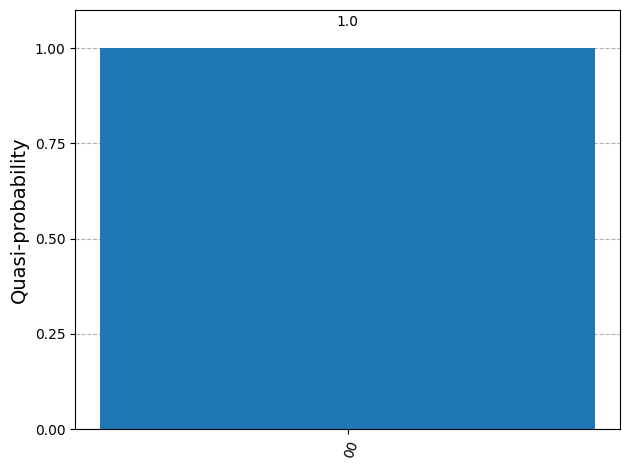

In [ ]:
# Listing 6.1: Apply the CNOT‐gate with |0> as control qubit
from math import sqrt
from qiskit import QuantumCircuit
from qiskit.visualization import plot_histogram
from qiskit_aer import Aer

# Redefine the quantum circuit
qc = QuantumCircuit(2)

# Initialise the qubits
qc.initialize([1,0], 0)
qc.initialize([1,0], 1)

# Apply the CNOT-gate
qc.cx(0,1)

# Tell Qiskit how to simulate our circuit
backend = Aer.get_backend('statevector_simulator')

# execute the qc
results = backend.run(qc).result().get_counts()

# plot the results
plot_histogram(results)

# Redefine the quantum circuit
qc = QuantumCircuit(2)

# Initialise the qubits
qc.initialize([1,0], 0)
qc.initialize([1,0], 1)

# Apply the CNOT-gate
qc.cx(0,1)

# Tell Qiskit how to simulate our circuit
backend = Aer.get_backend('statevector_simulator')

# execute the qc
results = backend.run(qc).result().get_counts()

# plot the results
plot_histogram(results)

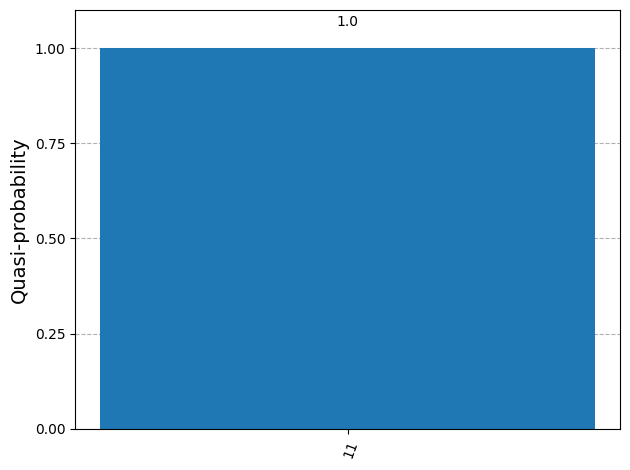

In [ ]:
# Listing 6.2: Apply the CNOT‐gate with |1> as control qubit
# Redefine the quantum circuit
qc = QuantumCircuit(2)

# Initialise the 0th qubit in the state `initial_state`
qc.initialize([0,1], 0)
qc.initialize([1,0], 1)

# Apply the CNOT-gate
qc.cx(0,1)

# Tell Qiskit how to simulate our circuit
backend = Aer.get_backend('statevector_simulator')

# execute the qc
results = backend.run(qc).result().get_counts()

# plot the results
plot_histogram(results)

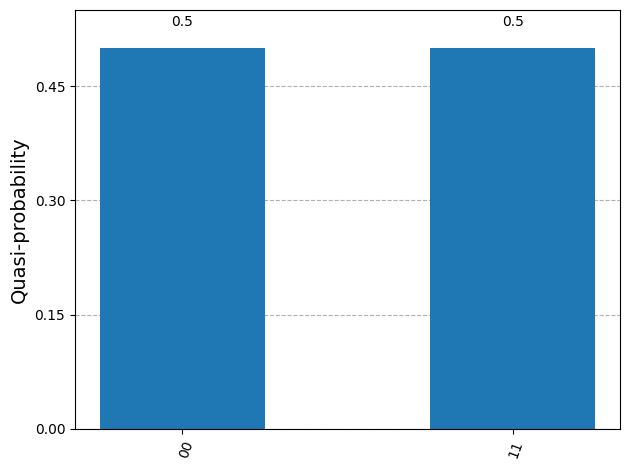

In [ ]:
# Listing 6.3: Apply the CNOT‐gate with |+> as control qubit
# Redefine the quantum circuit
qc = QuantumCircuit(2)

# Initialise the 0th qubit in the state `initial_state`
qc.initialize([1,0], 0)
qc.initialize([1,0], 1)

# Apply the Hadamard gate
qc.h(0)

# Apply the CNOT-gate
qc.cx(0,1)

# Tell Qiskit how to simulate our circuit
backend = Aer.get_backend('statevector_simulator')

# execute the qc
results = backend.run(qc).result().get_counts()

# plot the results
plot_histogram(results)

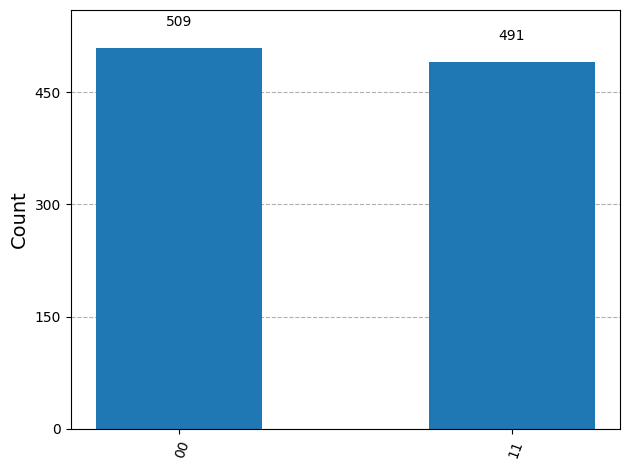

In [ ]:
# Listing 6.4: Measure the controlled qubit first
from qiskit import ClassicalRegister, QuantumRegister
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram

# Prepare a register of two qubits
qr = QuantumRegister(2)

# Prepare a register of two classical bits
cr = ClassicalRegister(2)

# Redefine the quantum circuit
qc = QuantumCircuit(qr, cr)

# Initialise the 0th qubit in the state `initial_state`
qc.initialize([1,0], 0)
qc.initialize([1,0], 1)

# Apply the Hadamard gate
qc.h(0)

# Apply the CNOT-gate
qc.cx(0,1)

# Measure the qubits to the classical bits, start with the controlled qubit
qc.measure(qr[1], cr[1])
qc.measure(qr[0], cr[0])

# Tell Qiskit how to simulate our circuit
backend = Aer.get_backend('qasm_simulator')

# execute the qc
results = backend.run(qc, shots=1000).result().get_counts()

# plot the results
plot_histogram(results)

In [ ]:
# Listing 6.5: Calculate the transformation matrix
from qiskit import QuantumCircuit
from qiskit_aer import Aer

# Create a quantum circuit with one qubit
qc = QuantumCircuit(2)

# apply the Identity gate to qubit 0 and Hadamard gate to qubit 1
qc.id(0)
qc.h(1)

backend = Aer.get_backend('unitary_simulator')
unitary = backend.run(qc).result().get_unitary()

# Display the results
unitary

Operator([[ 0.70710678+0.00000000e+00j,  0.        +0.00000000e+00j,
            0.70710678-8.65956056e-17j,  0.        +0.00000000e+00j],
          [ 0.        +0.00000000e+00j,  0.70710678+0.00000000e+00j,
            0.        +0.00000000e+00j,  0.70710678-8.65956056e-17j],
          [ 0.70710678+0.00000000e+00j,  0.        +0.00000000e+00j,
           -0.70710678+8.65956056e-17j,  0.        +0.00000000e+00j],
          [ 0.        +0.00000000e+00j,  0.70710678+0.00000000e+00j,
            0.        +0.00000000e+00j, -0.70710678+8.65956056e-17j]],
         input_dims=(2, 2), output_dims=(2, 2))


In [ ]:
# Listing 6.6: The run‐circuit helper function
from qiskit import QuantumCircuit
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

def run_circuit(qc,simulator='statevector_simulator', shots=1, hist=True):
    # Tell Qiskit how to simulate our circuit
    backend = Aer.get_backend(simulator)

    # execute the qc
    results = backend.run(qc, shots=shots).result().get_counts()

    # plot the results
    return plot_histogram(results, figsize=(18,4)) if hist else results

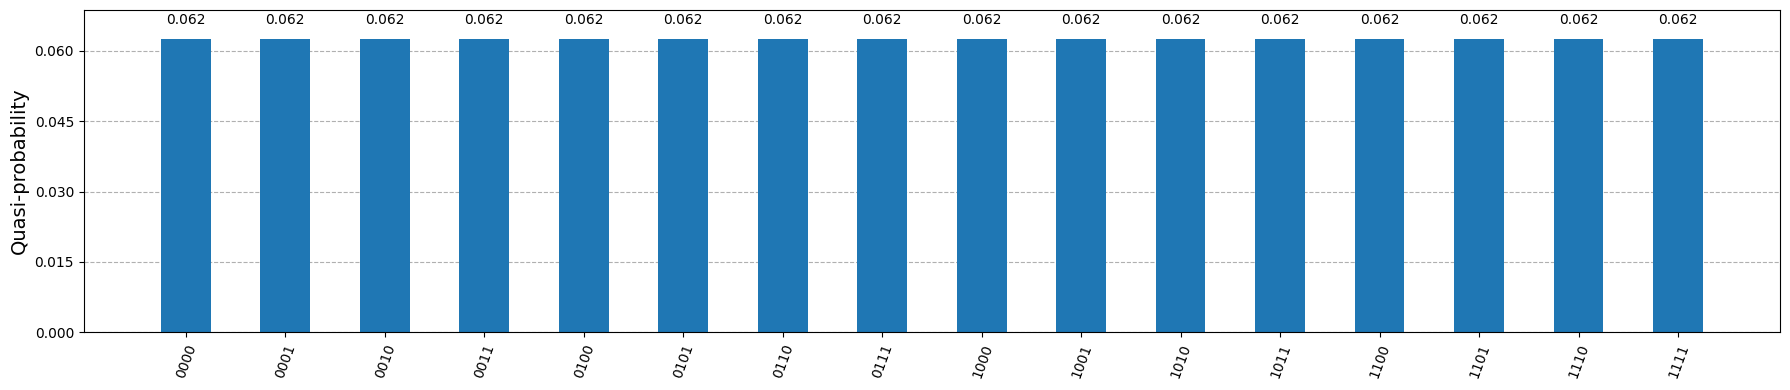

In [ ]:
# Listing 6.7: Create an exemplary histogram
qc = QuantumCircuit(4)
qc.h([0,1,2,3])
run_circuit(qc)

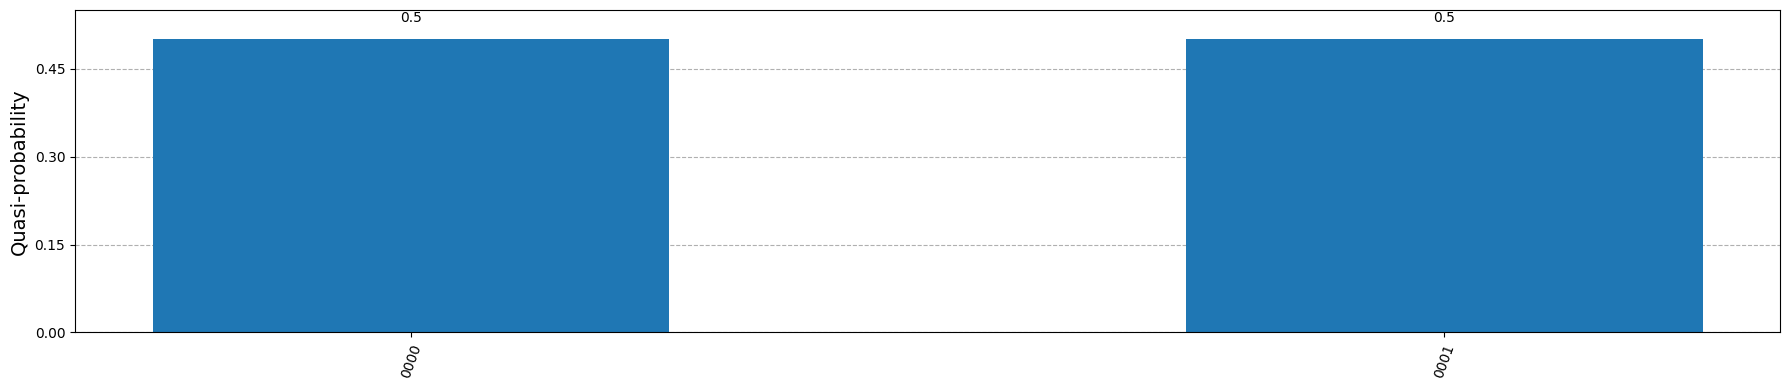

In [ ]:
# Listing 6.8: A single Hadamard gate
qc = QuantumCircuit(4)
qc.h(0)
run_circuit(qc)

In [ ]:
# Listing 6.9: Calculate the angle that represents a certain probability
from math import asin, sqrt

def prob_to_angle(prob):
    """
    Converts a given P(psi) value into an equivalent theta value.
    """
    return 2*asin(sqrt(prob))

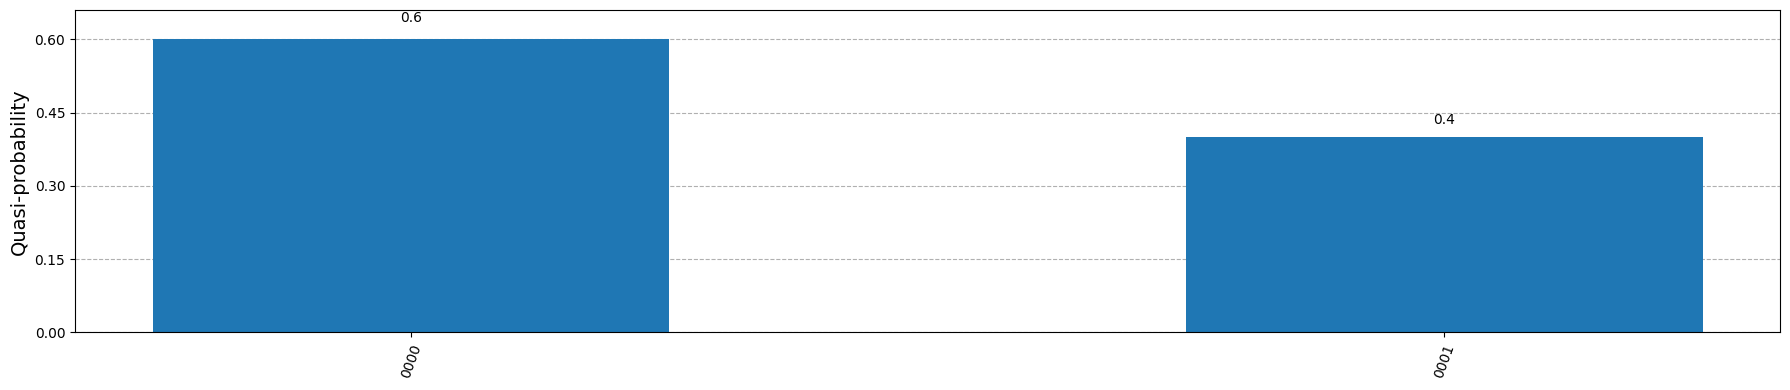

In [ ]:
# Listing 6.10: Specify the marginal probability
# Specify the marginal probability
event_a = 0.4

qc = QuantumCircuit(4)

# Set qubit to prior
qc.ry(prob_to_angle(event_a), 0)

run_circuit(qc)

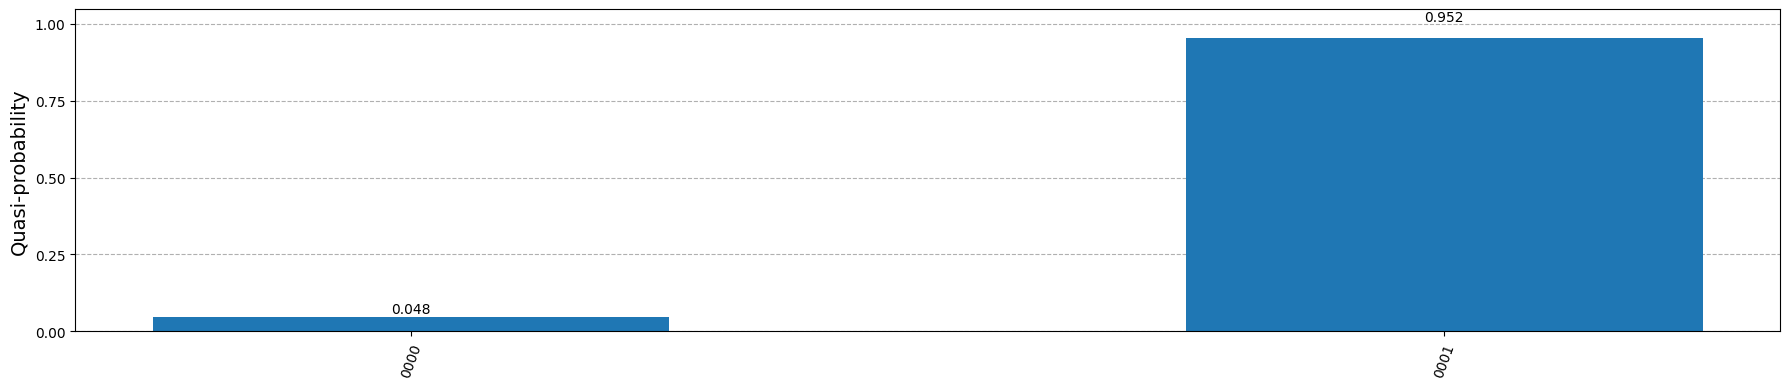

In [ ]:
# Listing 6.11: Represent two marginal probabilities with a single qubit
# Specify the marginal probabilities
event_a = 0.4
event_b = 0.8

qc = QuantumCircuit(4)

# Set qubit to prior
qc.ry(prob_to_angle(event_a), 0)

# Apply modifier
qc.ry(prob_to_angle(event_b), 0)

run_circuit(qc)

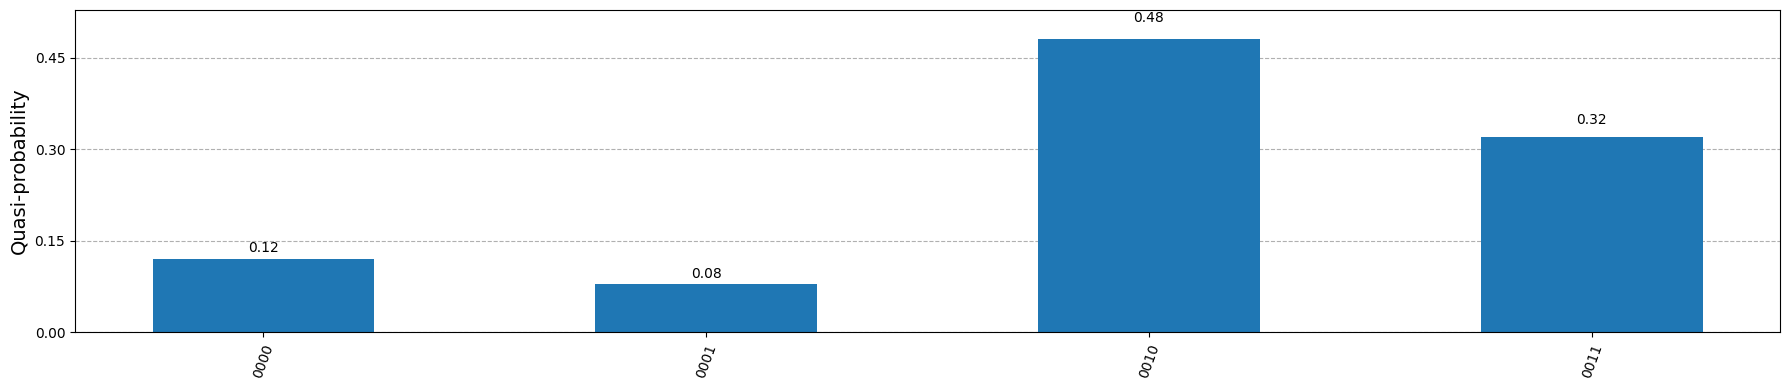

In [ ]:
# Listing 6.12: Each marginal probability uses a qubit
# Specify the marginal probabilities
event_a = 0.4
event_b = 0.8

qc = QuantumCircuit(4)

# Set qubit to event_a
qc.ry(prob_to_angle(event_a), 0)

# Set fresh qubit to event_b
qc.ry(prob_to_angle(event_b), 1)

run_circuit(qc)

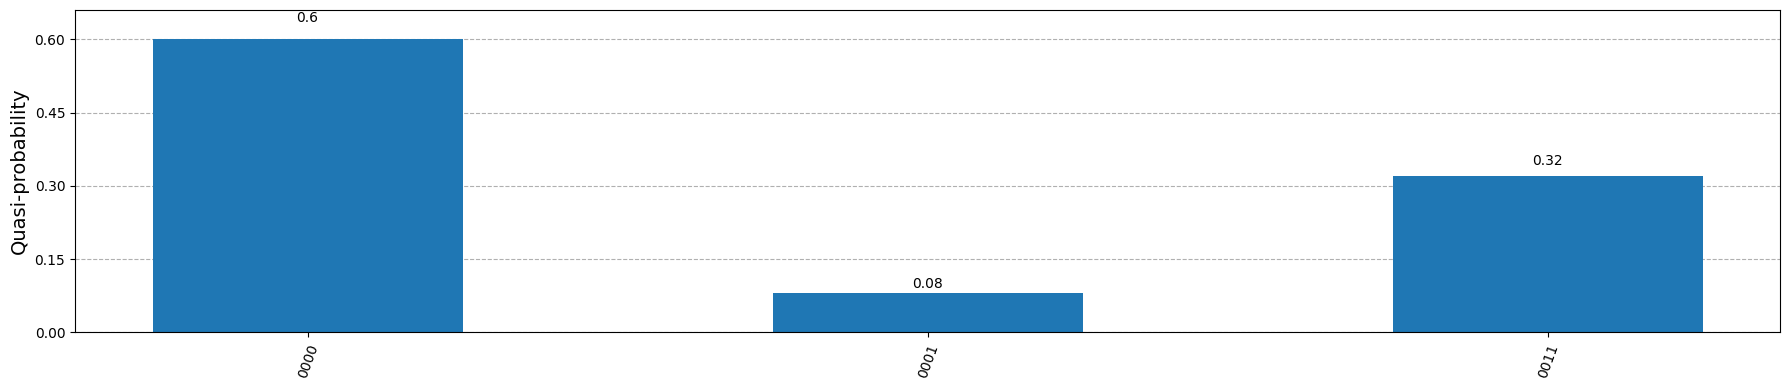

In [ ]:
# Listing 6.13: A controlled RY‐gate
# Specify the marginal probabilities
event_a = 0.4
event_b = 0.8

qc = QuantumCircuit(4)

# Set qubit to prior
qc.ry(prob_to_angle(event_a), 0)

# Apply half of the modifier
qc.ry(prob_to_angle(event_b)/2, 1)

# entangle qubits 0 and 1
qc.cx(0,1)

# Apply the other half of the modifier
qc.ry(-prob_to_angle(event_b)/2, 1)

# unentganle qubits 0 and 1
qc.cx(0,1)

run_circuit(qc)

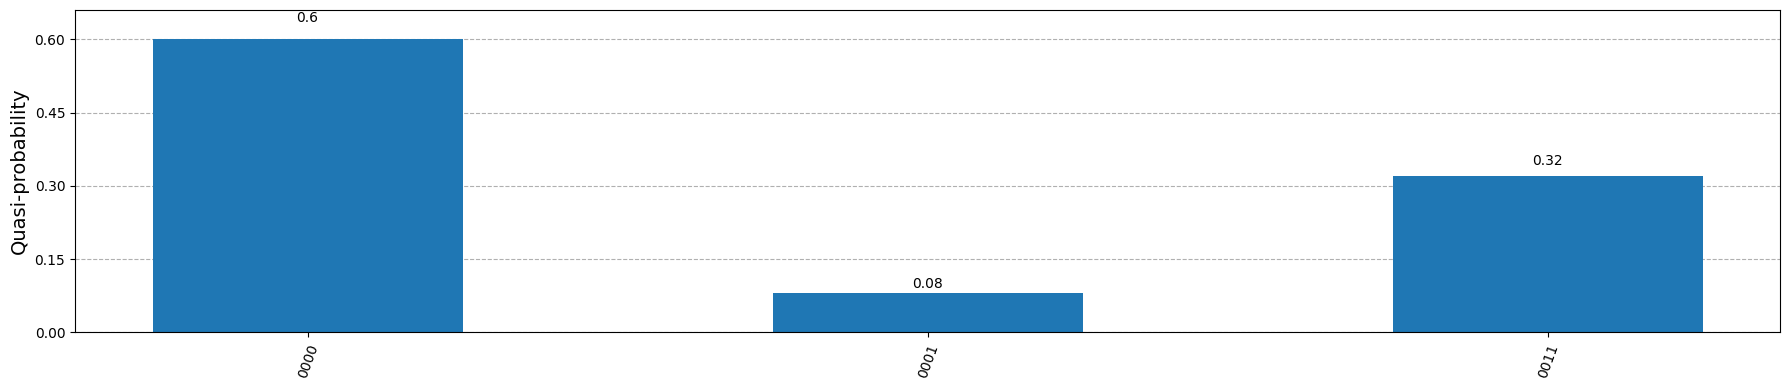

In [ ]:
# Listing 6.14: The controlled RY‐gate of Qiskit
# Specify the marginal probabilities
event_a = 0.4
event_b = 0.8

qc = QuantumCircuit(4)

# Set marginal probability
qc.ry(prob_to_angle(event_a), 0)

# Apply the controlled RY-gate
qc.cry(prob_to_angle(event_b), 0, 1)

run_circuit(qc)

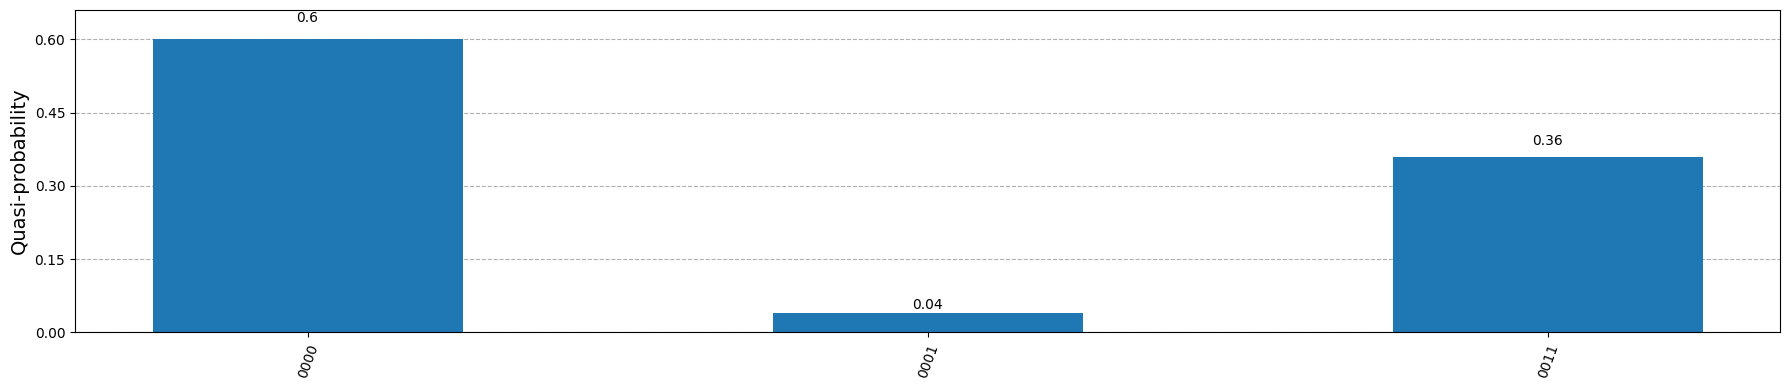

In [ ]:
# Listing 6.15: Calculate the conditional probability for a modifier < 1
# Specify the prior probability and the modifier
prior = 0.4
modifier = 0.9

qc = QuantumCircuit(4)

# Set qubit to prior
qc.ry(prob_to_angle(prior), 0)

# Apply the controlled RY-gate
qc.cry(prob_to_angle(modifier), 0, 1)

run_circuit(qc)

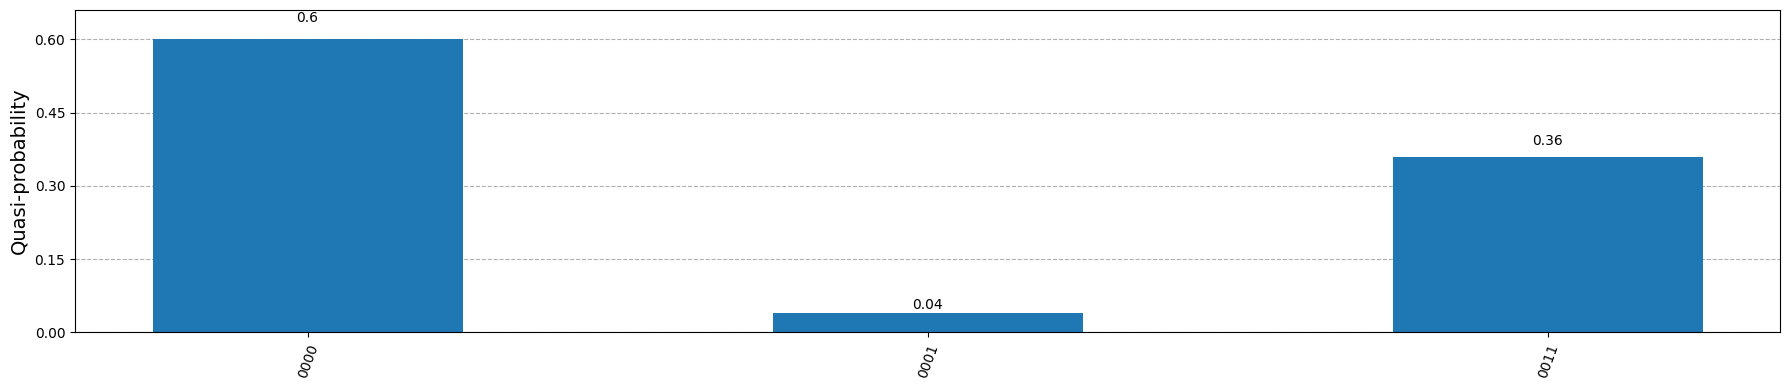

In [ ]:
# Listing 6.16: A modifier greater than 1
# Specify the prior probability and the modifier
prior = 0.4
modifier = 0.9

qc = QuantumCircuit(4)

# Set qubit to prior
qc.ry(prob_to_angle(prior), 0)

# Apply modifier
qc.cry(prob_to_angle(modifier), 0,1)

run_circuit(qc)

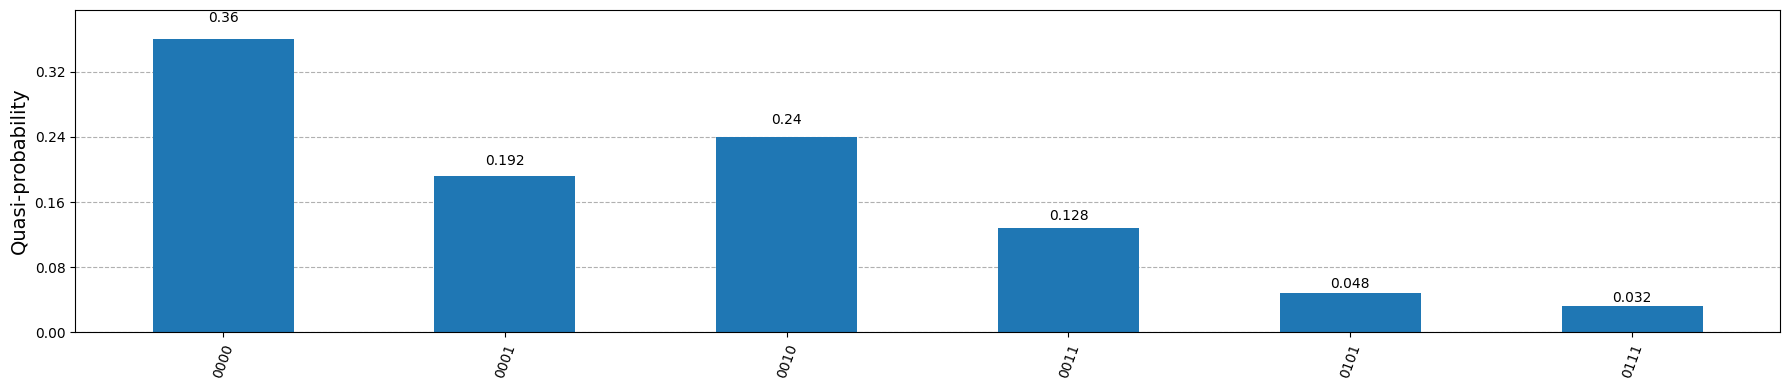

In [ ]:
# Listing 6.17: Working with a reduced modifier
# Specify the prior probability and the modifier
prior = 0.4
modifier = 1.2

qc = QuantumCircuit(4)

# Apply prior to qubit 0
qc.ry(prob_to_angle(prior), 0)

# Apply prior to qubit 1
qc.ry(prob_to_angle(prior), 1)

# Apply modifier to qubit 2
qc.cry(prob_to_angle(modifier-1), 0,2)

run_circuit(qc)

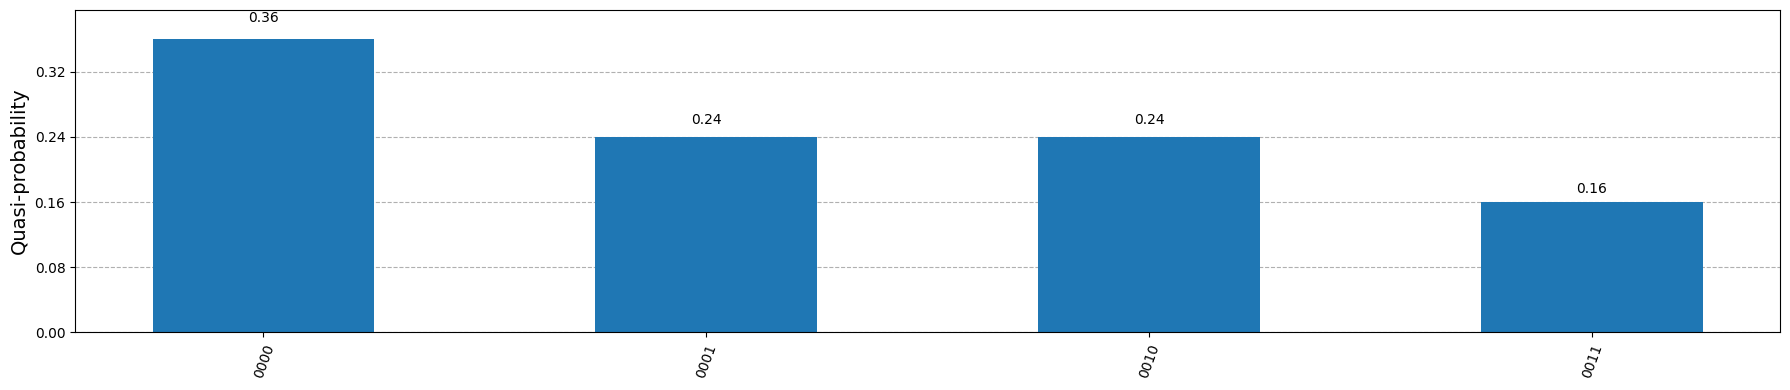

In [ ]:
# Listing 6.18: The overlap when applying the prior twice
# Specify the prior probability and the modifier
prior = 0.4
modifier = 1.2

qc = QuantumCircuit(4)

# Apply prior to qubit 0
qc.ry(prob_to_angle(prior), 0)

# Apply prior to qubit 1
qc.ry(prob_to_angle(prior), 1)

run_circuit(qc)

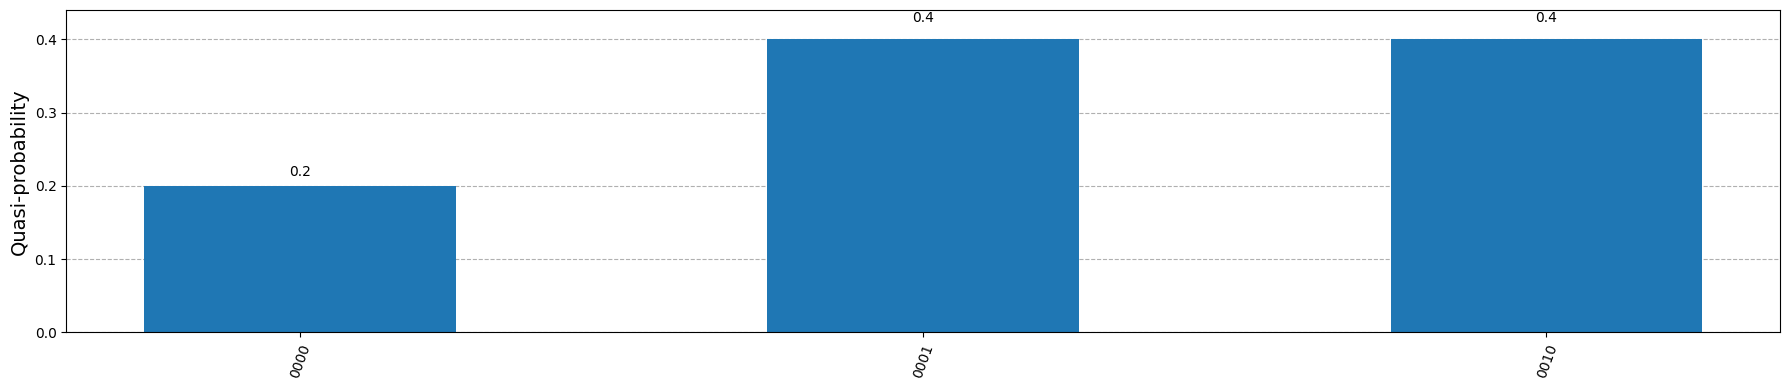

In [ ]:
# Listing 6.19: Applying the prior to qubit 1 from the remainder
# Specify the prior probability and the modifier
prior = 0.4
modifier = 1.2

qc = QuantumCircuit(4)

# Apply prior to qubit 0
qc.ry(prob_to_angle(prior), 0)

# Apply prior to qubit 1
qc.x(0)
qc.cry(prob_to_angle(prior/(1-prior)), 0, 1)
qc.x(0)

run_circuit(qc)

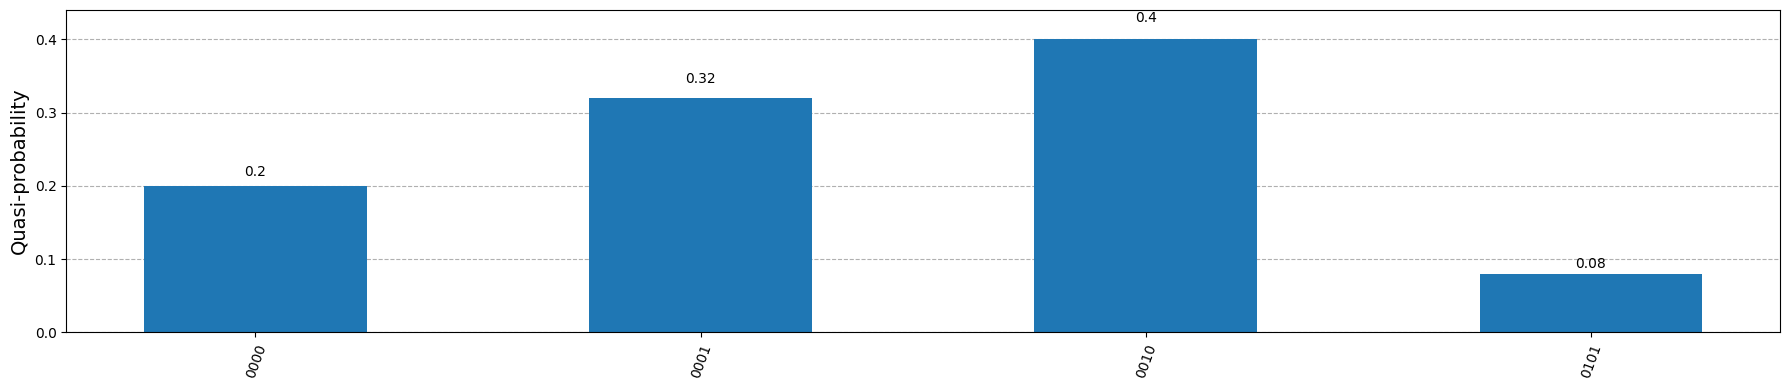

In [ ]:
# Listing 6.20: Apply the modifier on a separated prior
# Specify the prior probability and the modifier
prior = 0.4
modifier = 1.2

qc = QuantumCircuit(4)

# Apply prior to qubit 0
qc.ry(prob_to_angle(prior), 0)

# Apply prior to qubit 1
qc.x(0)
qc.cry(prob_to_angle(prior/(1-prior)), 0, 1)
qc.x(0)

# Apply the modifier to qubit 2
qc.cry(prob_to_angle(modifier-1), 0,2)

run_circuit(qc)

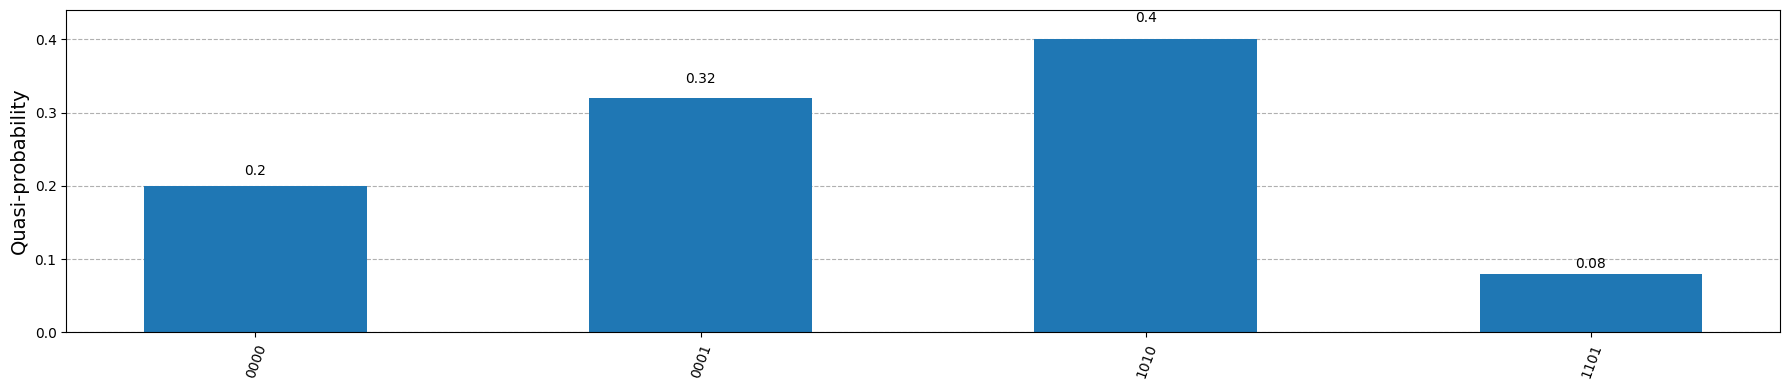

In [ ]:
# Listing 6.21: Qubit 3 represents the posterior
# Specify the prior probability and the modifier
prior = 0.4
modifier = 1.2

qc = QuantumCircuit(4)

# Apply prior to qubit 0
qc.ry(prob_to_angle(prior), 0)

# Apply prior to qubit 1
qc.x(0)
qc.cry(prob_to_angle(prior/(1-prior)), 0, 1)
qc.x(0)

# Apply the modifier to qubit 2
qc.cry(prob_to_angle(modifier-1), 0,2)

# Make qubit 3 represent the posterior
qc.cx(1,3)
qc.cx(2,3)

run_circuit(qc)

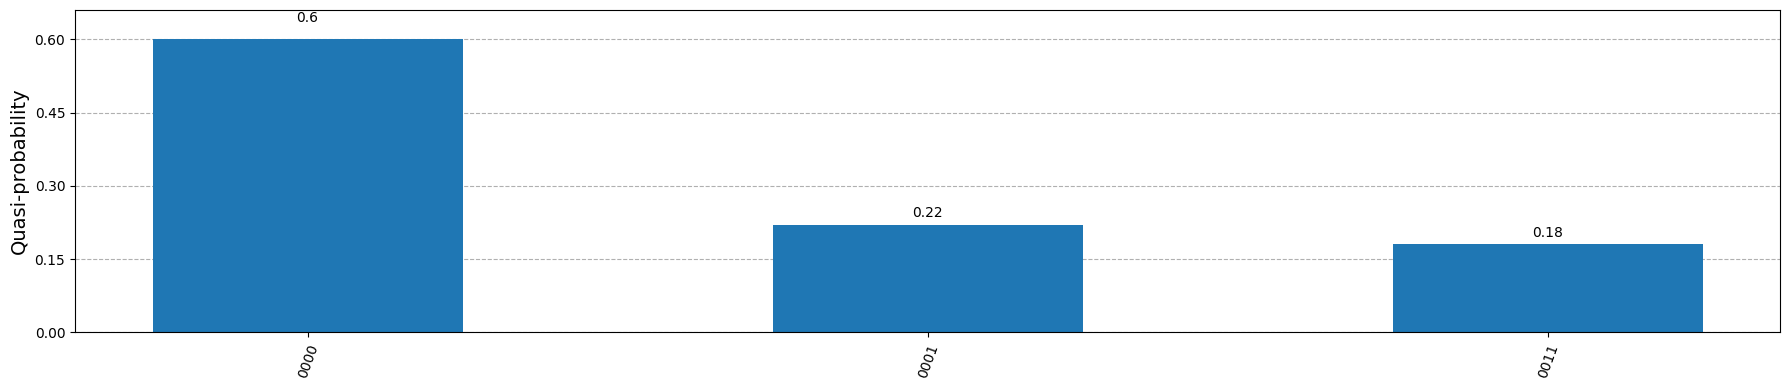

In [ ]:
# Listing 6.22: Setting aside a part of the prior
# Specify the prior probability
prior = 0.6

qc = QuantumCircuit(4)

# Apply prior to qubit 0
qc.ry(prob_to_angle(prior), 0)

# Apply 0.3*prior to qubit 1
qc.x(0)
qc.cry(prob_to_angle(0.3*prior/(1-prior)), 0, 1)

run_circuit(qc)

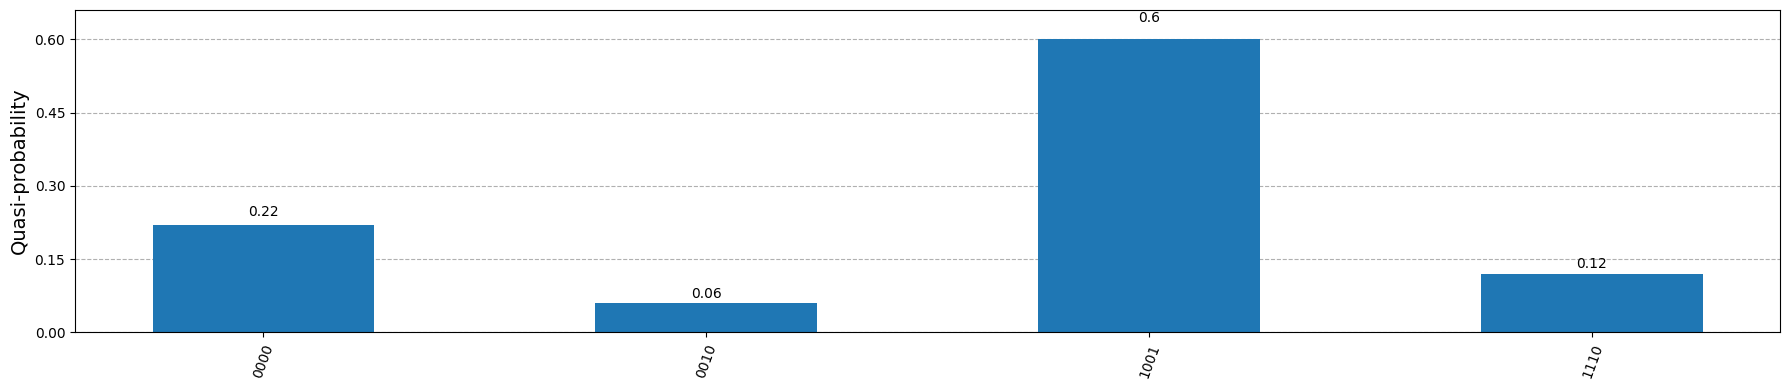

In [ ]:
# Listing 6.23: Calculating the posterior for prior > 0.5
# Specify the prior probability and the modifier
prior = 0.6
modifier = 1.2

qc = QuantumCircuit(4)

# Apply prior to qubit 0
qc.ry(prob_to_angle(prior), 0)

# Apply 0.3*prior to qubit 1
qc.x(0)
qc.cry(prob_to_angle(0.3*prior/(1-prior)), 0, 1)

# Apply the modifier to qubit 2
qc.cry(prob_to_angle((modifier-1)/0.3), 1,2)

# Make qubit 3 represent the posterior
qc.x(0)
qc.cx(0,3)
qc.cx(2,3)

run_circuit(qc)

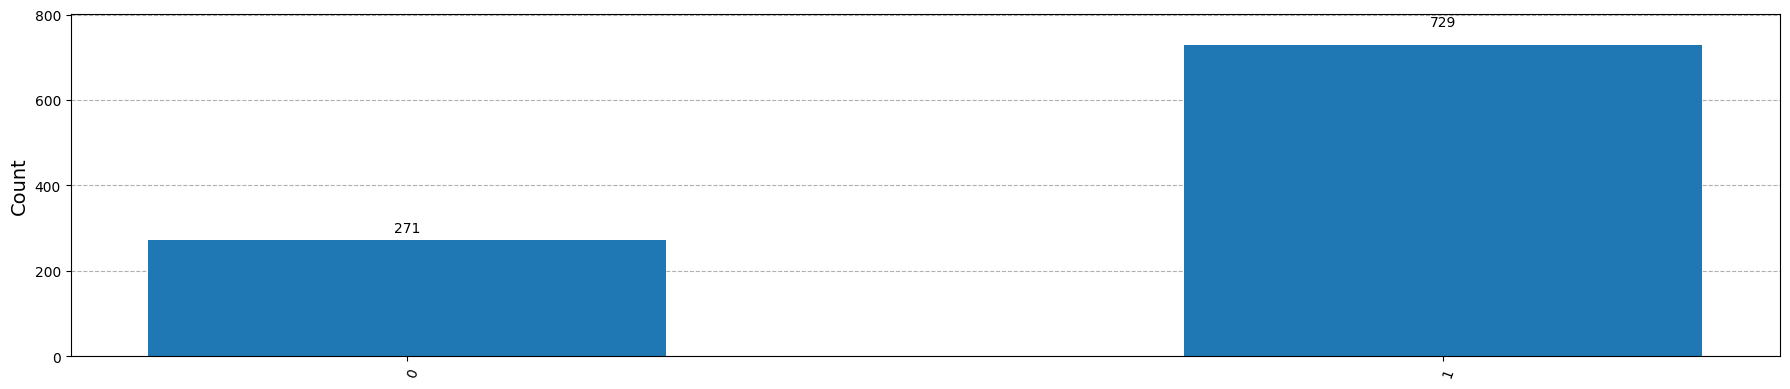

In [ ]:
# Listing 6.24: Calculating the posterior with a prior greater than 0.5
from math import ceil
from qiskit import ClassicalRegister, QuantumRegister

# Specify the prior probability and the modifier
prior = 0.6
modifier = 1.2

# Prepare the circuit with qubits and a classical bit to hold the measurement
qr = QuantumRegister(12)
cr = ClassicalRegister(1)
qc = QuantumCircuit(qr, cr)

# Apply prior to qubit 0
qc.ry(prob_to_angle(prior), 0)

# Separate parts of the prior
qc.x(0)
for i in range(1,10):
    qc.cry(prob_to_angle(min(1, (i*0.1)*prior/(1-prior))), 0,i)


# Apply the modifier
pos = ceil((modifier-1)*10)
qc.cry(prob_to_angle((modifier-1)/(pos*0.1)), pos,11)

# Make qubit 11 represent the posterior
qc.x(0)
qc.cx(0,11)

# measure the qubit
qc.measure(qr[11], cr[0])

run_circuit(qc, simulator='qasm_simulator', shots=1000 )